# Sakila database (DataJoint)

In [1]:
import datajoint as dj

In [2]:
schema = dj.Schema('shared_sakila')

Connecting dimitri@db.ust-db.link:3306


In [3]:
schema.spawn_missing_classes()

In [4]:
dj.Diagram(schema)

DataJointError: DataJoint can only work with acyclic dependencies

In [ ]:
Store()

In [ ]:
Payment() & 'amount >= 11'

In [ ]:
Actor & (FilmActor.proj() & (Film & (FilmCategory.proj() & (Category() & 'name="Horror"'))))

In [ ]:
Customer.proj().aggr(Rental, n='count(*)') & 'n > 45'

In [ ]:
dj.conn().query("""
ALTER TABLE shared_sakila.store DROP FOREIGN KEY fk_store_staff;
""")

```python
# drop cyclic foreign key
dj.conn().query("""
ALTER TABLE shared_sakila.store DROP FOREIGN KEY fk_store_staff;
""")

# restore cyclic foreign key
dj.conn().query("""
ALTER TABLE shared_sakila.store 
    ADD FOREIGN KEY `fk_store_staff` (`manager_staff_id`) REFERENCES `staff`(`staff_id`);
""")
```

In [5]:
dj.conn().query("ALTER TABLE shared_sakila.store DROP FOREIGN KEY fk_store_staff;")

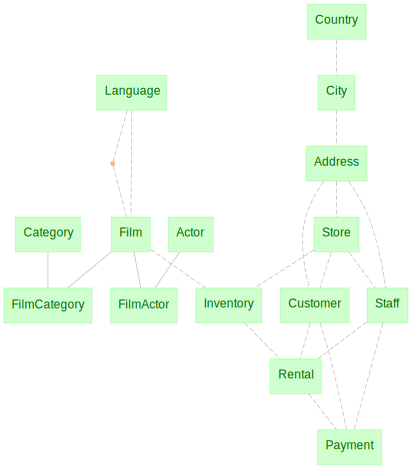

In [6]:
dj.Diagram(schema)

In [7]:
dj.conn().query("""
ALTER TABLE shared_sakila.store 
    ADD FOREIGN KEY `fk_store_staff` (`manager_staff_id`) REFERENCES `staff`(`staff_id`);
""")

In [8]:
dj.Diagram(schema)

DataJointError: DataJoint can only work with acyclic dependencies

In [ ]:
@schema
class StoreManager(dj.Manual):
    definition = """
    -> Store
    ---
    -> Staff
    """

In [ ]:
FilmText.drop()

In [ ]:
dj.conn().query("""
ALTER TABLE shared_sakila.inventory 
    ADD FOREIGN KEY (`film_id`) REFERENCES `shared_sakila`.`film_text`(`film_id`);
""")

## Virtual module

In [9]:
import datajoint as dj

In [10]:
sakila = dj.VirtualModule('sakila', 'shared_sakila')

In [11]:
sakila

<module 'sakila'>

In [12]:
dir(sakila)

['Actor',
 'Address',
 'Category',
 'City',
 'Country',
 'Customer',
 'Film',
 'FilmActor',
 'FilmCategory',
 'Inventory',
 'Language',
 'Payment',
 'Rental',
 'Staff',
 'Store',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'schema']

In [13]:
dj.Diagram(sakila)

DataJointError: DataJoint can only work with acyclic dependencies

In [14]:
sakila.schema.save('sakila.py')

DataJointError: DataJoint can only work with acyclic dependencies

In [ ]:
print(dj.conn().query('SHOW CREATE TABLE shared_sakila.store').fetchone()[1])

In [26]:
(Store).aggr(Payment.proj(..., q='last_update'), total='sum(amount)')

store_id,total calculated attribute
1,67416.51
2,67416.51


In [29]:
(Inventory().proj()).aggr(Rental, n='count(*)' )

inventory_id,n calculated attribute
1,3
2,5
3,2
4,2
6,5
7,4
8,2
9,2
10,3
11,2


In [ ]:
(Store & store )

In [ ]:
dj.Diagram(schema)

In [ ]:
Staff.proj(seller='concat(first_name, " ", last_name)') * Rental.proj(..., '-last_update')

In [ ]:
Rental()

In [ ]:
Film.describe();

In [ ]:
Film()

In [ ]:
Film & 'original_language_id is not NULL'

In [ ]:
Language()

In [ ]:
Language().describe();

# DataJoint Queries

In [ ]:
dj.Diagram(schema)

In [ ]:
q = Actor()

In [ ]:
q

In [ ]:
a = query.fetch(as_dict=True, order_by=('last_name', 'first_name'), limit=10, offset=10)

In [ ]:
q & 'month(last_update) = 3'

In [ ]:
q.proj(..., cid="customer_id")

In [ ]:
q

In [ ]:
last_rental = (Rental() & 'return_date > "2005-09-02"').proj('customer_id')

In [ ]:
last_rentals

In [ ]:
last_rental.fetch(as_dict=True)

In [ ]:
Customer & last_rental

# PyMySQL

In [ ]:
print(last_rental.make_sql())

In [ ]:
import pymysql 


In [ ]:
conn = pymysql.connect(
    host=dj.config['database.host'],
    passwd=dj.config['database.password'],
    user=dj.config['database.user'])

In [ ]:
cursor = conn.cursor()

In [ ]:
cursor.execute('SHOW SCHEMAS')

In [ ]:
cursor.execute('USE shared_sakila')

In [ ]:
cursor.execute('SHOW TABLES')

In [ ]:
cursor.fetchall()

In [ ]:
cursor.execute('SELECT * FROM customer')

In [ ]:
cursor.execute('SELECT * FROM customer WHERE customer_id = 1 ')

In [ ]:
cursor.fetchall()

In [ ]:
cursor.execute('SELECT * FROM rental WHERE return_date > "2005-09-02" ')

In [ ]:
cursor.execute('SELECT * FROM rental WHERE return_date is NULL')

In [ ]:
cursor.execute('SELECT * FROM rental WHERE return_date is NOT NULL')

In [ ]:
Customer & (Rental & 'return_date is NULL').proj('customer_id') 

In [ ]:
cursor.execute(
    """
    SELECT * 
    FROM customer 
    WHERE customer_id IN (
        SELECT customer_id 
        FROM rental 
        WHERE return_date IS NULL)
    """)

In [ ]:
cursor.execute("SELECT customer_id, rental_date FROM rental")

In [ ]:
cursor.fetchone()

In [ ]:
cursor.execute("SELECT DISTINCT customer_id FROM rental")

In [ ]:
cursor.execute("SELECT DISTINCT customer_id FROM rental WHERE return_date IS NULL")

In [ ]:
cursor.execute("SELECT DISTINCT customer_id cid FROM rental WHERE return_date IS NULL")

In [ ]:
Store()

In [ ]:
Rental()

### Problem 1

Show all rentals of intentory from Store 1

In [ ]:
q = Rental & (Inventory() & 'store_id=1').proj()

In [ ]:
(Rental * Customer.proj(..., '-last_update')).make_sql()

In [ ]:
cursor.execute("""
SELECT * FROM rental 
WHERE inventory_id IN (SELECT inventory_id FROM inventory WHERE store_id=1)
""")

### Problem 2

Show all staff that work at Store 1

In [ ]:
Staff() & 'store_id=1'

In [ ]:
cursors.execute("""
SELECT staff_id 
FROM staff 
WHERE store_id=1
""")